In [1]:
import pandas as pd
from pulp import *

In [2]:
import plotly.express as px
import seaborn as sns
# sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("diet.xls",nrows=64)

# Data Exploration

In [4]:
x = 'Foods'
columns = ['Price/ Serving', 'Calories', 'Cholesterol mg',
       'Total_Fat g', 'Sodium mg', 'Carbohydrates g', 'Dietary_Fiber g',
       'Protein g', 'Vit_A IU', 'Vit_C IU', 'Calcium mg', 'Iron mg']

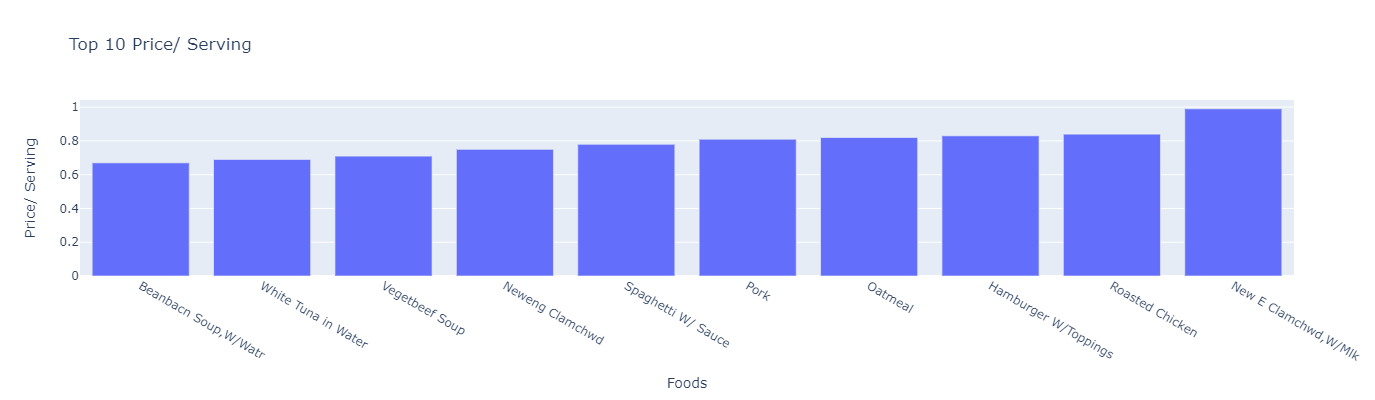

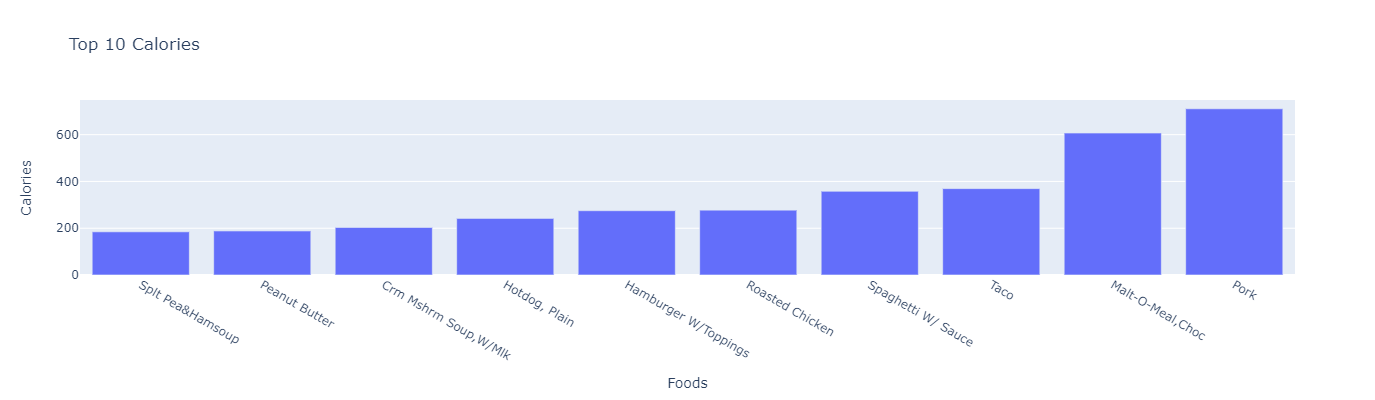

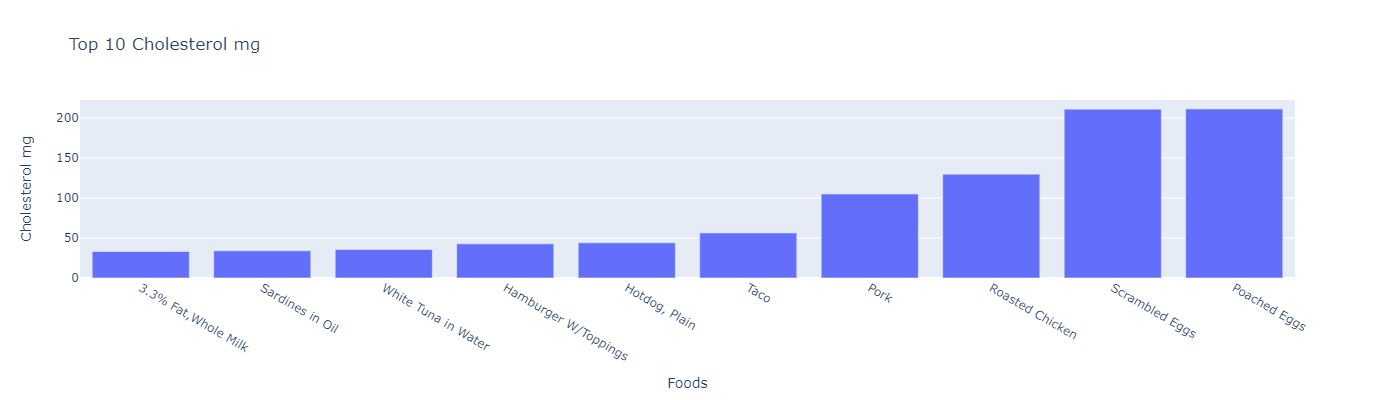

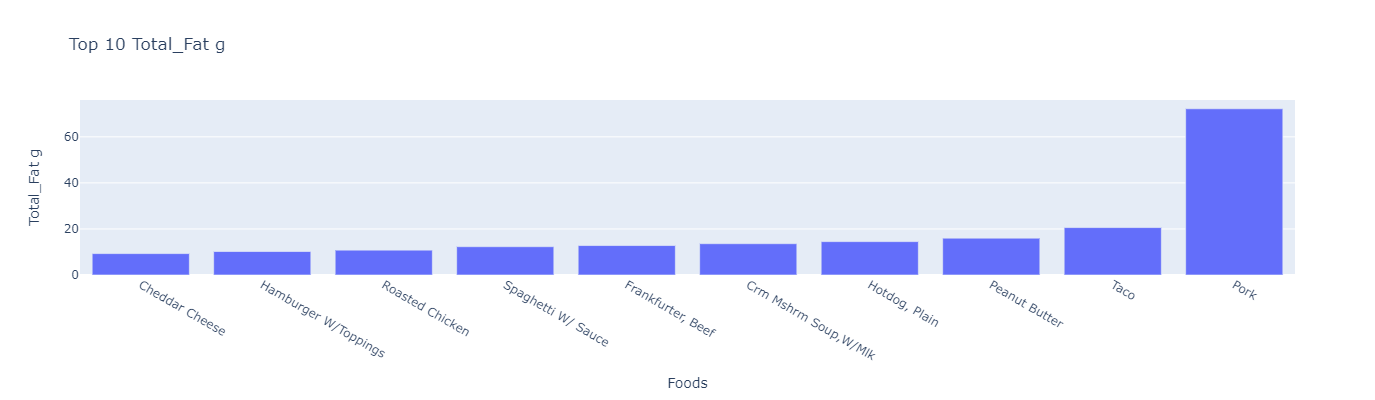

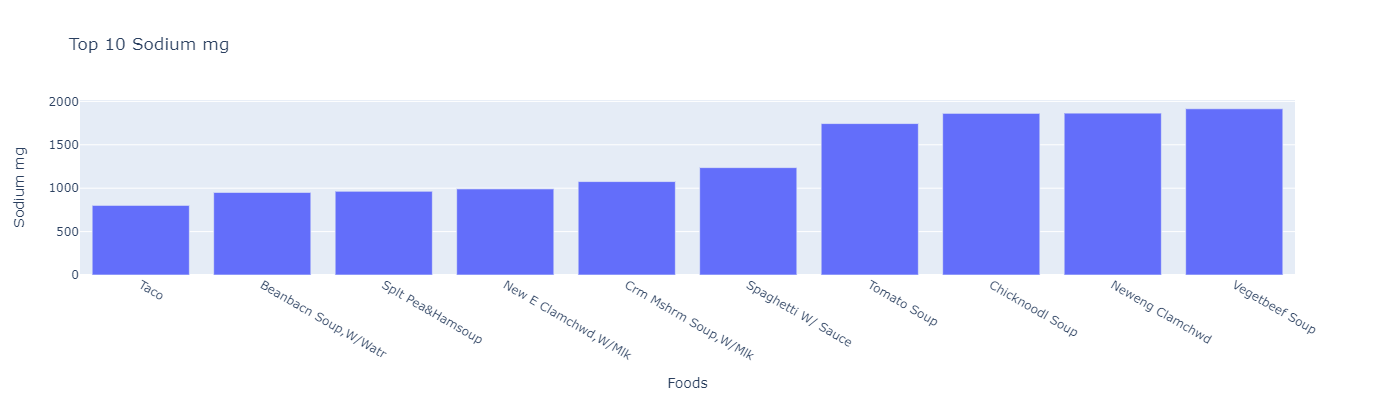

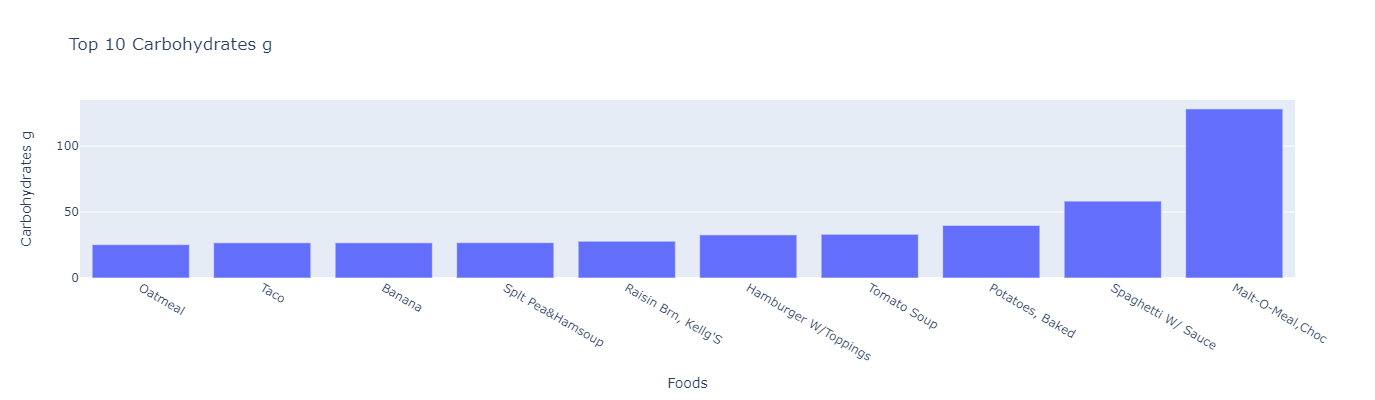

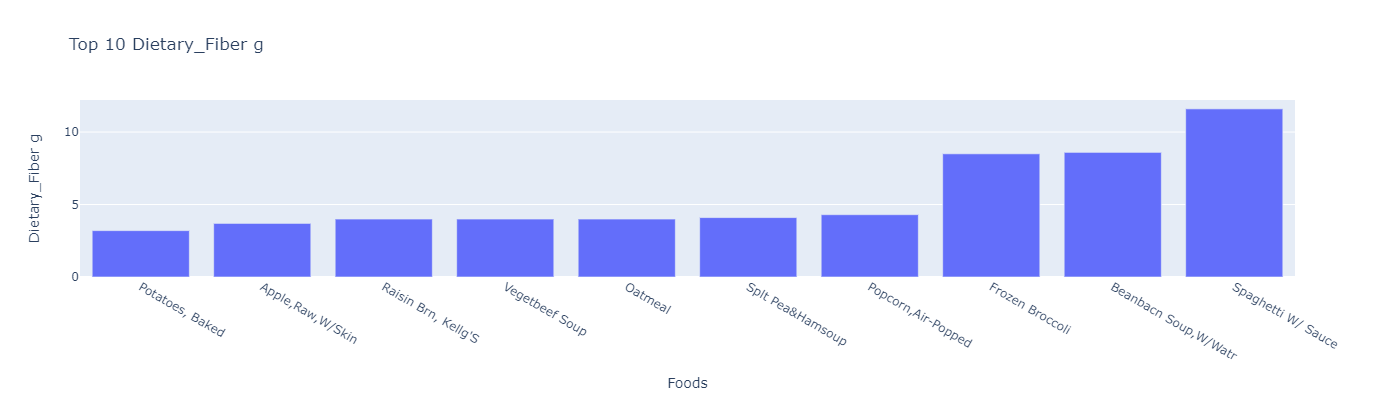

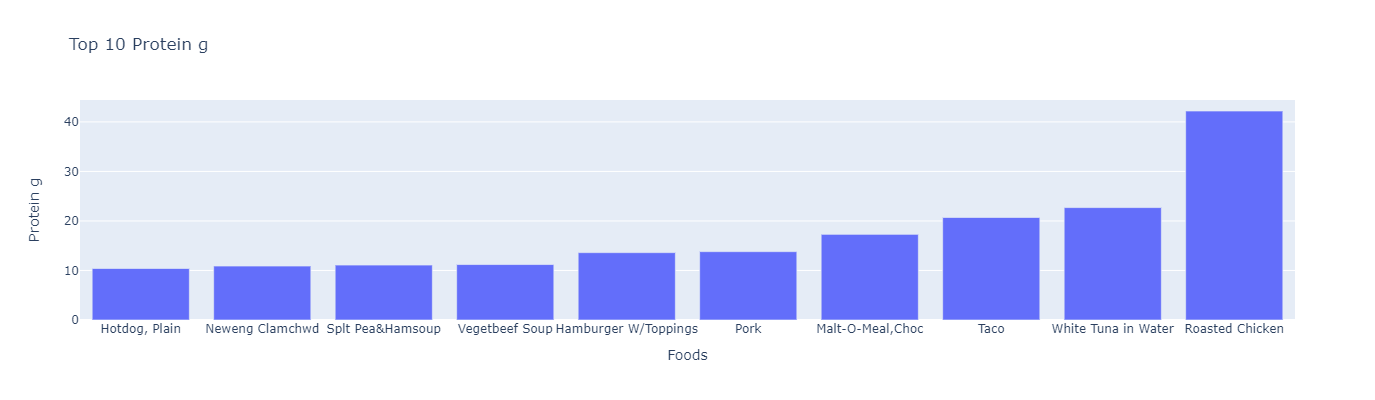

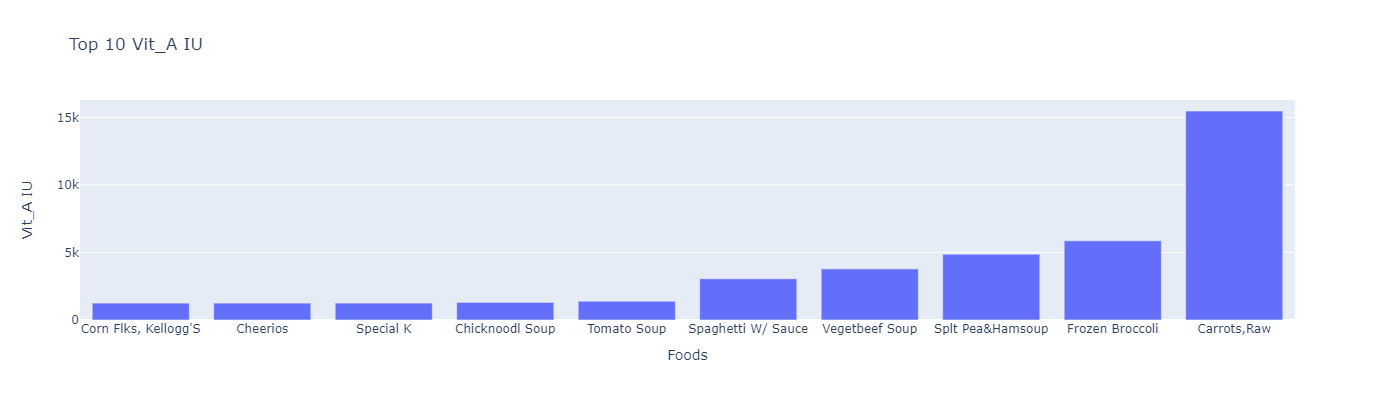

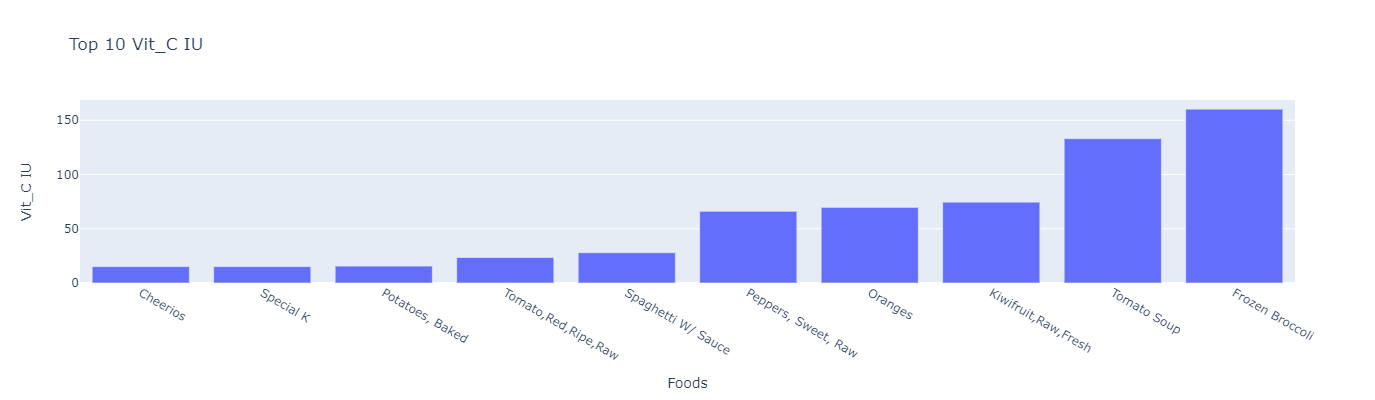

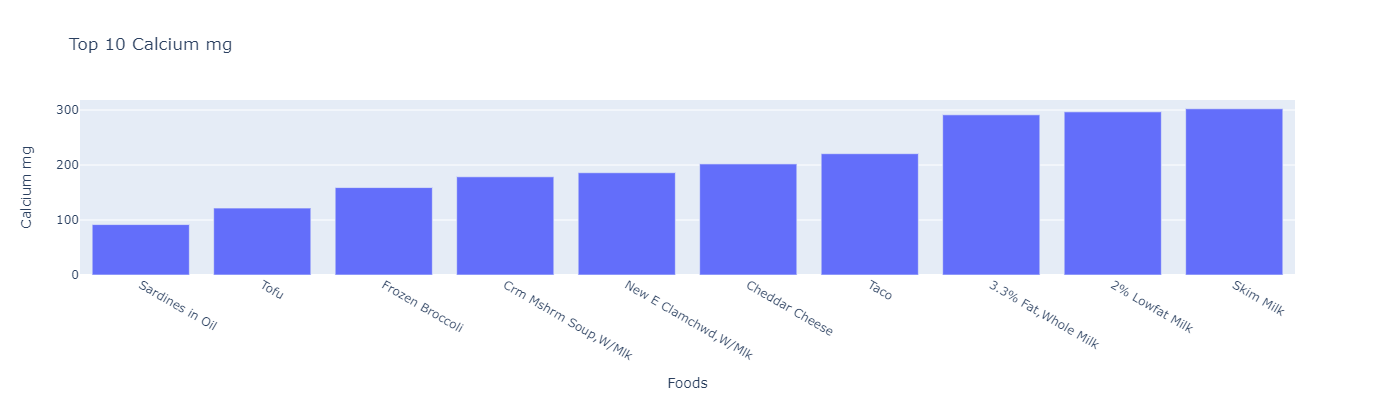

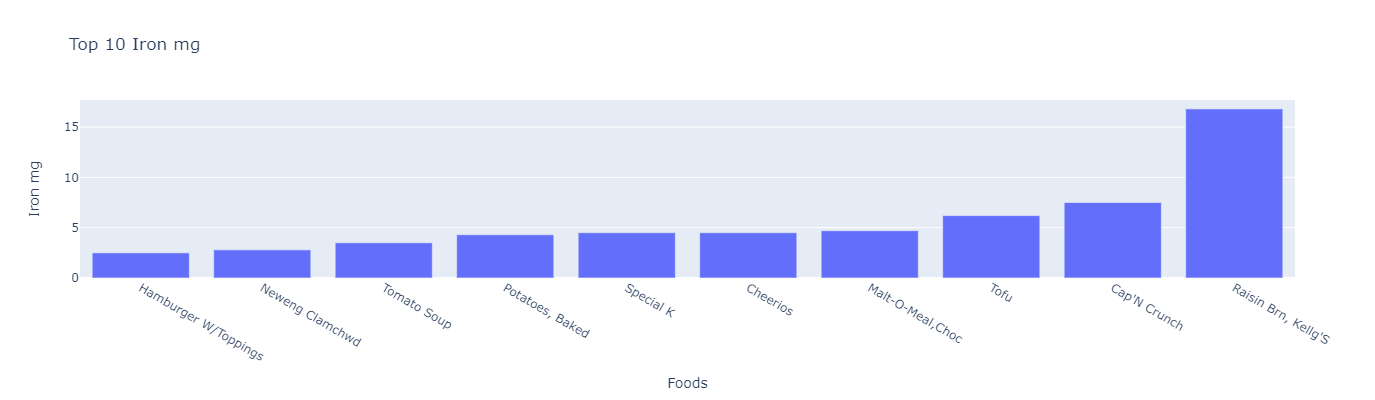

In [5]:
for i in columns:
    fig = px.bar(df.sort_values(i).tail(10), x=x, y=i, width=800, height=400,title='Top 10 '+i)
    fig.show()
    print('')

# Simple Optimization

In [25]:
# Creating the problem 
prob = LpProblem("Simple_Diet_Problem",LpMinimize)

In [26]:
# Creating the variables
price = dict(zip(df['Foods'],df['Price/ Serving']))

cal = dict(zip(df['Foods'],df['Calories']))

chol = dict(zip(df['Foods'],df['Cholesterol mg']))

fat = dict(zip(df['Foods'],df['Total_Fat g']))

sodium = dict(zip(df['Foods'],df['Sodium mg']))

carbs = dict(zip(df['Foods'],df['Carbohydrates g']))

fiber = dict(zip(df['Foods'],df['Dietary_Fiber g']))

protein = dict(zip(df['Foods'],df['Protein g']))

calcium = dict(zip(df['Foods'],df['Calcium mg']))

iron = dict(zip(df['Foods'],df['Iron mg']))

vit_A = dict(zip(df['Foods'],df['Vit_A IU']))

vit_C = dict(zip(df['Foods'],df['Vit_C IU']))

In [27]:
food_vars = LpVariable.dicts("Food",df['Foods'],lowBound=0,cat='Integer')

In [28]:
# Adding equation to minizime
prob += lpSum([price[i]*food_vars[i] for i in df['Foods']]), "Total Cost of the balanced diet"

In [29]:
# Adding calorie constrainst 
prob += lpSum([cal[f] * food_vars[f] for f in df['Foods']]) >= 1500.0, "CalorieMinimum"
prob += lpSum([cal[f] * food_vars[f] for f in df['Foods']]) <= 2500.0, "CalorieMaximum"

prob += lpSum([chol[f] * food_vars[f] for f in df['Foods']]) >= 30.0, "CholesterolMinimum"
prob += lpSum([chol[f] * food_vars[f] for f in df['Foods']]) <= 240.0, "CholesterolMaximum"

# Fat
prob += lpSum([fat[f] * food_vars[f] for f in df['Foods']]) >= 20.0, "FatMinimum"
prob += lpSum([fat[f] * food_vars[f] for f in df['Foods']]) <= 70.0, "FatMaximum"

# Sodium
prob += lpSum([sodium[f] * food_vars[f] for f in df['Foods']]) >= 800.0, "SodiumMinimum"
prob += lpSum([sodium[f] * food_vars[f] for f in df['Foods']]) <= 2000.0, "SodiumMaximum"

# Carbs
prob += lpSum([carbs[f] * food_vars[f] for f in df['Foods']]) >= 130.0, "CarbsMinimum"
prob += lpSum([carbs[f] * food_vars[f] for f in df['Foods']]) <= 450.0, "CarbsMaximum"

# Fiber
prob += lpSum([fiber[f] * food_vars[f] for f in df['Foods']]) >= 125.0, "FiberMinimum"
prob += lpSum([fiber[f] * food_vars[f] for f in df['Foods']]) <= 250.0, "FiberMaximum"

# Protein
prob += lpSum([protein[f] * food_vars[f] for f in df['Foods']]) >= 60.0, "ProteinMinimum"
prob += lpSum([protein[f] * food_vars[f] for f in df['Foods']]) <= 100.0, "ProteinMaximum"

# Vitamin A
prob += lpSum([vit_A[f] * food_vars[f] for f in df['Foods']]) >= 1000.0, "VitaminAMinimum"
prob += lpSum([vit_A[f] * food_vars[f] for f in df['Foods']]) <= 10000.0, "VitaminAMaximum"

# Vitamin C
prob += lpSum([vit_C[f] * food_vars[f] for f in df['Foods']]) >= 400.0, "VitaminCMinimum"
prob += lpSum([vit_C[f] * food_vars[f] for f in df['Foods']]) <= 5000.0, "VitaminCMaximum"

# Calcium
prob += lpSum([calcium[f] * food_vars[f] for f in df['Foods']]) >= 700.0, "CalciumMinimum"
prob += lpSum([calcium[f] * food_vars[f] for f in df['Foods']]) <= 1500.0, "CalciumMaximum"

# Iron
prob += lpSum([iron[f] * food_vars[f] for f in df['Foods']]) >= 10.0, "IronMinimum"
prob += lpSum([iron[f] * food_vars[f] for f in df['Foods']]) <= 40.0, "IronMaximum"

In [30]:
prob.solve()
LpStatus[prob.status]

'Optimal'

In [31]:
print("Therefore, the optimal (least cost) balanced diet consists of\n"+"-"*110)
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

Therefore, the optimal (least cost) balanced diet consists of
--------------------------------------------------------------------------------------------------------------
Food_Celery,_Raw = 41.0
Food_Kiwifruit,Raw,Fresh = 1.0
Food_Lettuce,Iceberg,Raw = 91.0
Food_Oranges = 2.0
Food_Poached_Eggs = 1.0
Food_Popcorn,Air_Popped = 14.0


In [32]:
print("Cost is: $%s"%(round(value(prob.objective),2)))

Cost is: $4.89
